In [6]:
#importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Reading the dataset
df = pd.read_csv('mushrooms.csv')
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#since the dataset has only categorical values, we can use the label encoder to convert them into numerical values
from sklearn.preprocessing import LabelEncoder
import pandas as pd

try:
    df = pd.read_csv('mushrooms.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'mushrooms.csv' not found. Please place the file in the correct directory.")
    exit()

print("\n--- Original DataFrame Head ---")
print(df.head())
print("\nOriginal DataFrame shape:", df.shape)




Dataset loaded successfully!

--- Original DataFrame Head ---
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                 

In [9]:
# --- 1. Preprocessing ---
# This section converts the categorical text data into a numerical format.

# Separate Features (X) and Target (y)
X = df.drop('class', axis=1)
y = df['class']

# Encode the Target Variable (y) using LabelEncoder
# 'e' (edible) becomes 0, 'p' (poisonous) becomes 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode the Feature Variables (X) using One-Hot Encoding
# This creates a new binary column for each category in the original features
X_encoded = pd.get_dummies(X)

print(f"\nData preprocessed. Features shape: {X_encoded.shape}, Target shape: {y_encoded.shape}")


Data preprocessed. Features shape: (8124, 117), Target shape: (8124,)


In [10]:
# --- 2. Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing.
# random_state ensures that the split is the same every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 6499 samples
Test set size: 1625 samples



Training the Logistic Regression model...
Model training complete!

Evaluating the model on the test set...

Model Accuracy: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


--- Confusion Matrix ---


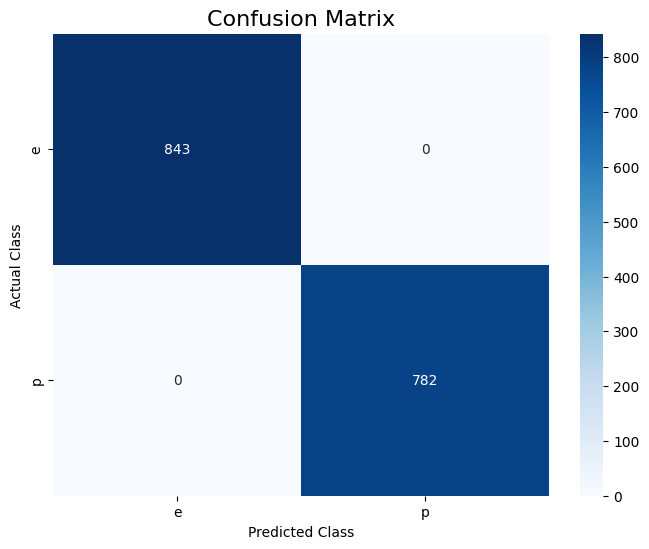

In [11]:
# --- 3. Build and Train the Logistic Regression Model ---
print("\nTraining the Logistic Regression model...")

# Initialize the model
# max_iter is increased to ensure the model converges, which can be an issue on some datasets.
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete!")

# --- 4. Make Predictions and Evaluate the Model ---
print("\nEvaluating the model on the test set...")

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display the Classification Report
# This shows precision, recall, and f1-score for each class.
print("\n--- Classification Report ---")
# target_names uses the original labels from the LabelEncoder for better readability.
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Display the Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

